In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"E:\Data Science\Assignments\Case Study on Unsupervised Learning\Wine_clust .csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.drop(0,axis =0,inplace = True)

In [6]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
df.shape

(177, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 1 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               177 non-null    float64
 1   Malic_Acid            177 non-null    float64
 2   Ash                   177 non-null    float64
 3   Ash_Alcanity          177 non-null    float64
 4   Magnesium             177 non-null    int64  
 5   Total_Phenols         177 non-null    float64
 6   Flavanoids            177 non-null    float64
 7   Nonflavanoid_Phenols  177 non-null    float64
 8   Proanthocyanins       177 non-null    float64
 9   Color_Intensity       177 non-null    float64
 10  Hue                   177 non-null    float64
 11  OD280                 177 non-null    float64
 12  Proline               177 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.1 KB


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler =StandardScaler()
 
features =scaler.fit(df)
features =features.transform(df)
 
# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df.columns)
# Print the scaled data
scaled_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


In [11]:
### K-Means requires unlabeled data in order to run.

X = scaled_df.values

In [12]:
X

array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

ELbow Method to find Number of cluster

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\A

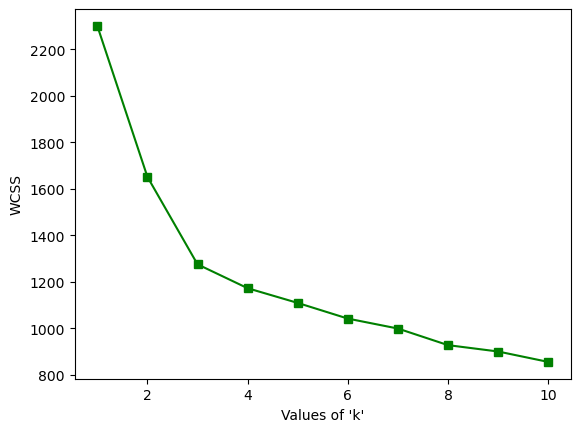

In [13]:
from sklearn.cluster import KMeans

wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

It is clear from the above graph that there is turning like an elbow at k=3

In [14]:
### Let’s perform the K-Means clustering for n_clusters=3.

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
kmeans.cluster_centers_

array([[ 0.8357291 , -0.30216785,  0.36721188, -0.60827451,  0.5708371 ,
         0.89019864,  0.98294513, -0.56332364,  0.57747028,  0.17071251,
         0.47669521,  0.77753292,  1.13284982],
       [ 0.17413735,  0.86670215,  0.18770849,  0.51830993, -0.06515558,
        -0.9738198 , -1.20966401,  0.7211921 , -0.77389929,  0.94047672,
        -1.15990159, -1.29087819, -0.40140101],
       [-0.92093046, -0.39645493, -0.4918932 ,  0.16416829, -0.48458659,
        -0.07134318,  0.0266648 , -0.03720084,  0.06527965, -0.89811962,
         0.46271652,  0.28315814, -0.74819057]])

In [17]:
labels =kmeans.labels_

### Dimensionality Reduction Technique PCA

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,2.230243,0.302313
1,2.531922,-1.062257
2,3.754677,-2.805309
3,1.020131,-0.888380
4,3.049199,-2.170007


In [19]:
### Reducing the cluster centers using PCA.
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[ 2.27047052e+00, -9.57683079e-01],
       [-2.71509522e+00, -1.10458484e+00],
       [-4.43778446e-04,  1.76542299e+00]])

In [20]:
pca1 = PCA(n_components =10)
pca1.fit(scaled_df)
X_pca1 = pca1.transform(scaled_df)

In [21]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.35983071, 0.5522435 , 0.6640381 , 0.73514919, 0.80143663,
       0.8510403 , 0.89350044, 0.92048035, 0.94272497, 0.96171025])

The cluster plot based on PCA1 and PCA2. Differentiate clusters by passing a color parameter as c=kmeans.labels_

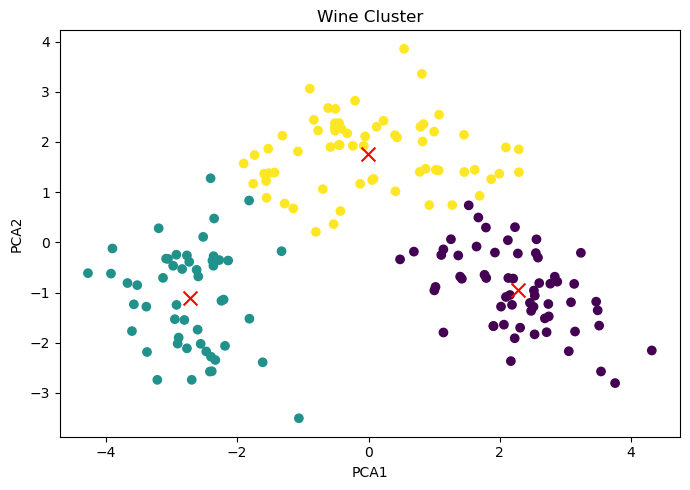

In [22]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

In [23]:
### the best number of principal components is much less than the number of variables in the original dataset.
pca.components_

array([[ 0.13788809, -0.24638109, -0.0043183 , -0.23737955,  0.1350017 ,
         0.39586939,  0.42439422, -0.29913568,  0.31280321, -0.09328558,
         0.29956536,  0.37720252,  0.28428101],
       [-0.48583464, -0.22157478, -0.31528188,  0.01214349, -0.30028828,
        -0.07054905, -0.00173207, -0.02466918, -0.04144561, -0.52801878,
         0.27405069,  0.16544914, -0.3695384 ]])

Text(0, 0.5, 'Euclidean Distance')

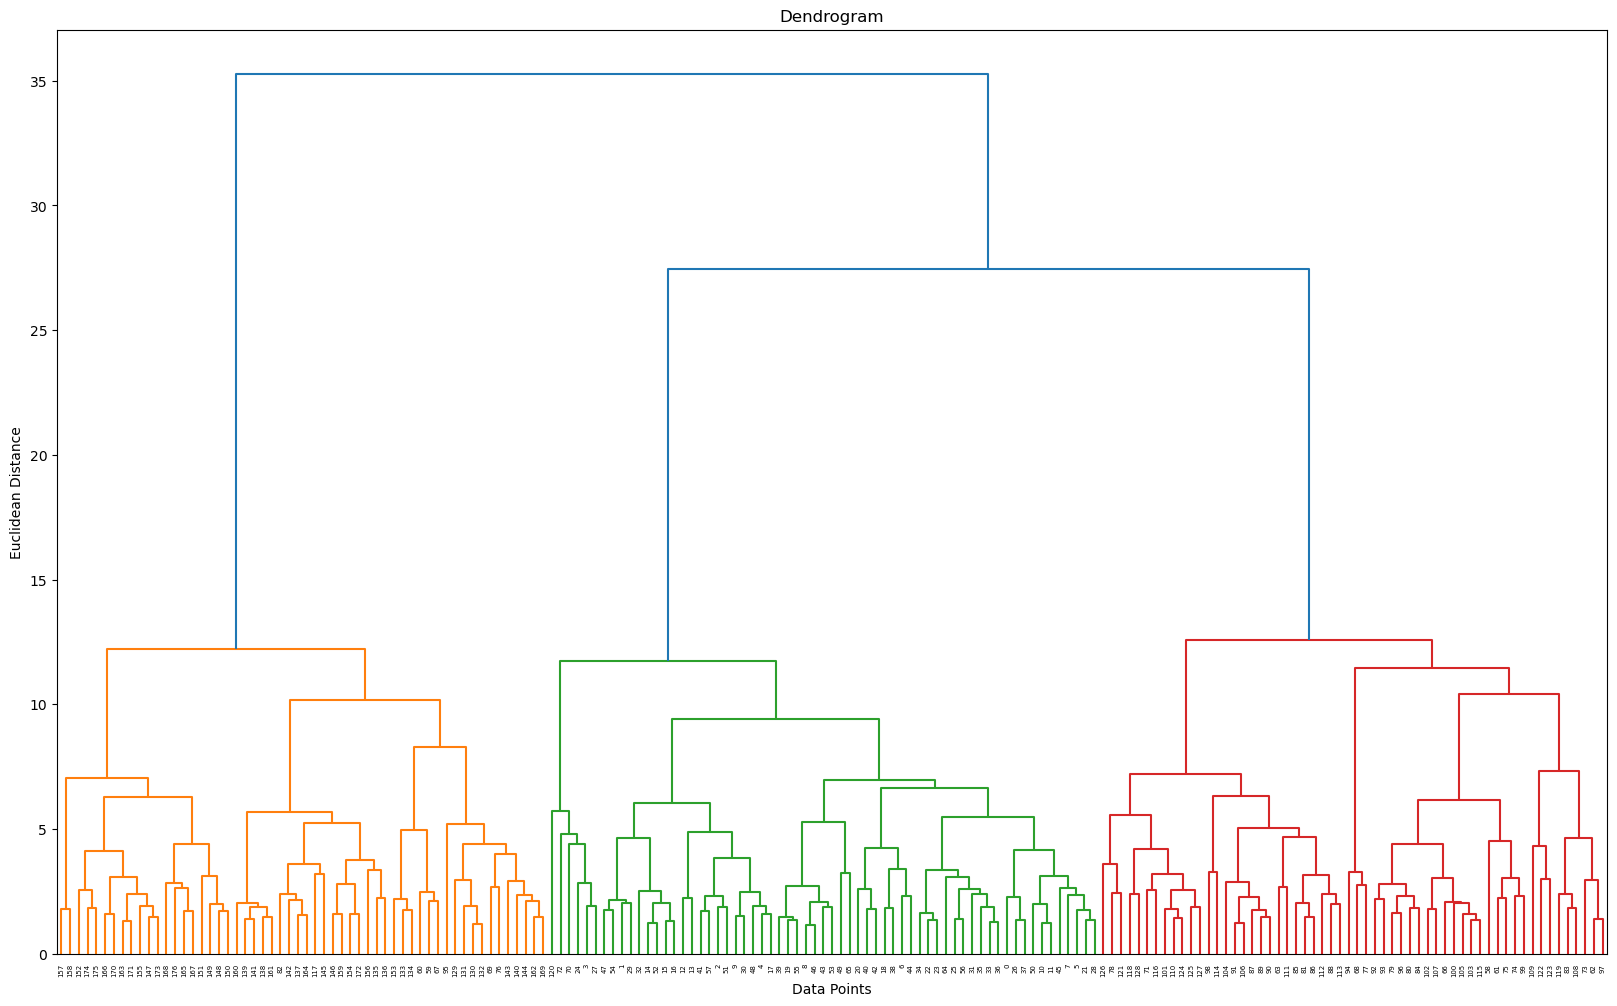

In [24]:
## Plot Dendrogram to Identify the clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20,12))
dendrogram = sch.dendrogram(sch.linkage(scaled_df,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')

longest distance cuts the three intersection lines,therefore cluster = 3

## Agglomerative Clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters=3 ,affinity ='euclidean',linkage = 'ward')
y_ahc = ahc.fit_predict(scaled_df)
y_ahc

E:\Anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2,
       0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

## Silhuette Score

In [26]:
from sklearn.metrics import silhouette_score
sil_ahc = silhouette_score(scaled_df,y_ahc)
y_ahc1 = ahc.fit_predict(scaled_df)
sil_ahc

E:\Anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.27631805856826086

In [27]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state = 42)
y_means =kmeans.fit_predict(X)
y_means

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [28]:
silhouette_avg = silhouette_score(X, labels)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.2835806364948403


In [29]:
cluster_range = range(2,10)

In [30]:
silhouette_scores = []

for num_clusters in cluster_range:
    # Fit the K-means model
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    
    # Compute the silhouette score
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    
    # Append the score to the list
    silhouette_scores.append(score)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\A

In [31]:
silhouette_scores

[0.2673593122478238,
 0.2835806364948403,
 0.2605301778673073,
 0.23353859291597234,
 0.19289506949398255,
 0.19679484426859659,
 0.2006671878930618,
 0.1493953974312673]

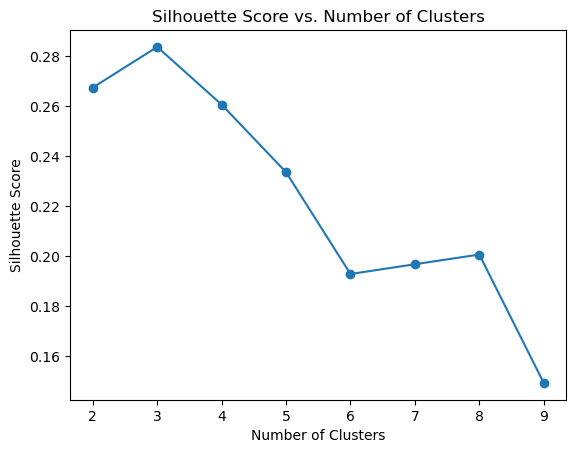

In [32]:
# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

## DB Scan Clustering

In [33]:
from sklearn.cluster import DBSCAN

# Assuming you have your data in the variable 'X'
dbscan = DBSCAN(eps=3, min_samples=5)  # Set epsilon and min_samples according to your data
dbscan_labels = dbscan.fit_predict(X)
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [34]:
db_sil = silhouette_score(X,labels)
db_sil

0.1493953974312673

The cluster plot based on PCA1 and PCA2. Differentiate clusters by passing a color parameter as c=dbscan.labels_

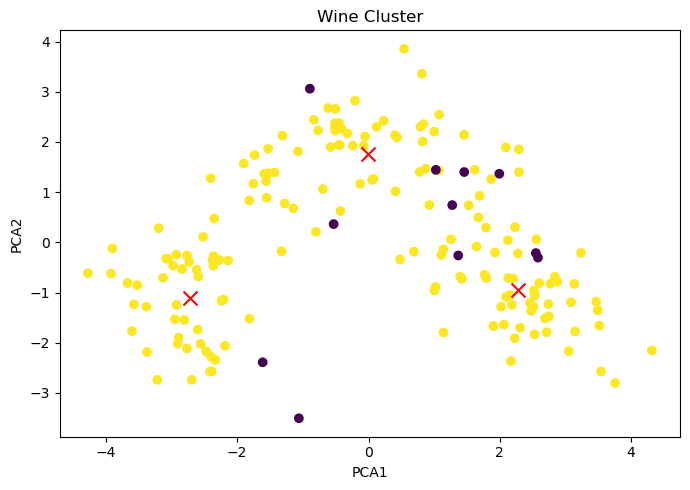

In [35]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=dbscan.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

The cluster plot based on PCA1 and PCA2. Differentiate clusters by passing a color parameter as c=agglomerative clustering.labels_

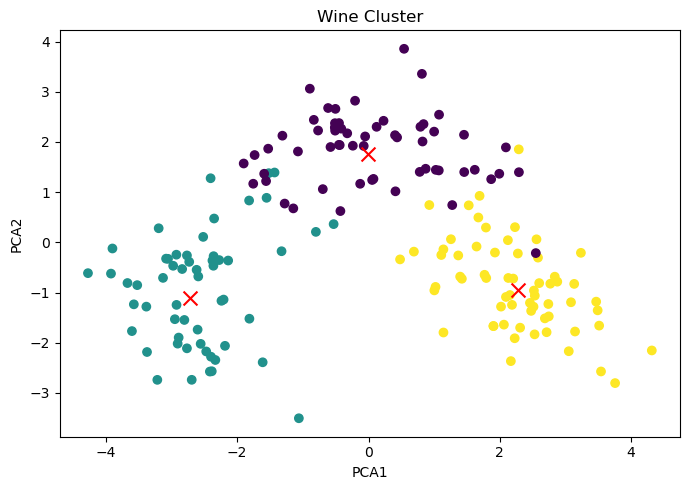

In [36]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=ahc.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()